# ML - Perceptron
Function:    $$ f(x) = sign(wx + b) $$

Sign function:
$$ sign(x) = \begin{cases}
+1 & x \ge 0\\
-1 & x <0
\end{cases}
$$

Loss fucntion:  $$L(w, b) = - \Sigma y_i (w * x_i + b)$$

Alogrithm for original method:

(1) select random $w_0, b_0$ <br/>
(2) select data $(x_i, y_i)$ in trainning data<br/>
(3) if $$y_i(w \cdot x_i  +b) \le 0 $$ <br/>
    Then: <br/>
    $$w \leftarrow w + \eta y_i x_i$$
    $$b \leftarrow b + \eta y_i$$
(4) back to step(2), until there is no incorect traning data.


Alogrithm for dual perceptron:<br/>
(1) select random $w_0, b_0$ <br/>
(2) select data $(x_i, y_i)$ in trainning data<br/>
(3) if $$y_i(\sum_{j=1}^{N}\alpha_i y_i \cdot x_i+b) \le 0 $$ <br/>
    Then:  <br/>
    $$\alpha_i \leftarrow \alpha_i + \eta$$
    $$b \leftarrow b + \eta y_i$$
(4) back to step(2), until there is no incorect traning data. <br/>
Tips 1: Gram matrix used for dual mode. $$G = [x_i\cdot x_j]_{N* N}$$<br/>
Tips 2: $$w = \sum_{i=1}^{N} \alpha_i y_i x_i$$ <br/>
$$b = \sum_{i=1}^{N} \alpha_i y_i$$ <br/>

In [ ]:
**distance**:  
$ L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$

## Prepare test data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Load Iris 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

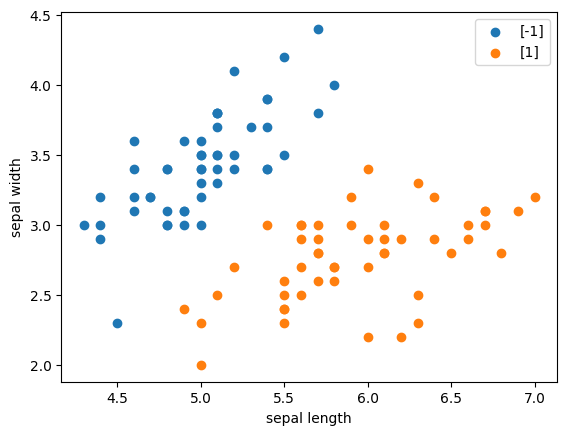

In [15]:
# Plot dataset
plt.scatter(df[: 50]["sepal length"], df[:50]["sepal width"], label = [-1])
plt.scatter(df[50 : 100]["sepal length"], df[50 :100]["sepal width"], label = [1])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [16]:
# define the trainning data
# select :100 as tranning test data. set 'sepal length', 'sepal width' as feature, and select 'label' as result.
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, : -1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])
print(X.shape)
print(y.shape)

(100, 2)
(100,)


## Implement the original perceptron

In [18]:
class perceptron:
    def __init__(self, max_iter=1000, shuffle=False):
        self.b = 0
        self.learningRate = 0.1
        self.max_iter = max_iter
        self.iter = 0
        self.shuffle = shuffle

    def sign(self, x, w, b):
        return np.dot(w, x) + b

    def fit(self, X, y):
        N, M = X.shape
        self.w = np.ones(M)
        for n in range(self.max_iter):
            self.iter = n
            wrong_items = 0
            if self.shuffle:
                idx = np.random.permutation(range(N))
                X, y = X[idx], y[idx]

            for i in range(N):
                if y[i] * self.sign(X[i], self.w, self.b) <= 0:
                    self.w += self.learningRate * np.dot(y[i], X[i])
                    self.b += self.learningRate * y[i]
                    wrong_items += 1
            if wrong_items == 0:
                print("Finished at iteration :{}, w:{}, b: {}".format(self.iter, self.w, self.b))
                return
        print("Finished at the max iteration :{}, w:{}, b: {}".format(self.max_iter, self.w, self.b))

In [20]:
# Trainning
perceptron1 = perceptron(shuffle=True)
perceptron1.fit(X, y)

Finished at iteration :434, w:[ 6.67 -8.45], b: -10.599999999999978


In [22]:
# Result Visualization
def plot(model,  title):
    x_points = np.linspace(4, 7, 10)
    y_ = - (model.w[0] * x_points + model.b)/model.w[1]
    plt.plot(x_points, y_)
    print(y_)

    plt.plot(data[:50, 0], data[:50, 1], "bo", color = "blue", label = "-1")
    plt.plot(data[50:100, 0], data[50:100, 1], "bo", color = "orange", label = "1")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title(title)
    plt.legend()

[1.90295858 2.16607495 2.42919132 2.69230769 2.95542406 3.21854043
 3.4816568  3.74477318 4.00788955 4.27100592]


/tmp/ipykernel_940483/3072526338.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], "bo", color = "blue", label = "-1")
/tmp/ipykernel_940483/3072526338.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], "bo", color = "orange", label = "1")


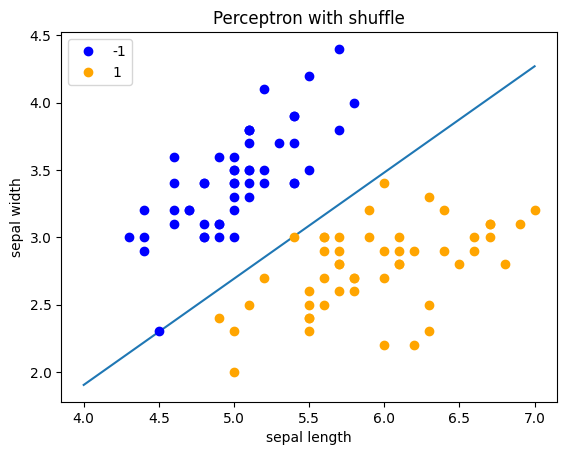

In [23]:
plot(perceptron1, "Perceptron with shuffle")

## Implement the dual perceptron

In [28]:
class perceptron_dual:
    def __init__(self, max_iter=1000):
        self.b = 0
        self.learningRate = 0.1
        self.max_iter = max_iter
        self.iter = 0

    def calc_w(self, X):
        w = 0
        for i in range(len(self.alpha)):
            w += self.alpha[i] * y[i] * X[i]
        return w

    def gram_matrix(self, X):
        return np.dot(X, X.T)

    def fit(self, X, y):
        N, M = X.shape
        self.alpha = np.zeros(N)
        gram = self.gram_matrix(X)
        for n in range(self.max_iter):
            self.iter = n
            wrong_items = 0
            for i in range(N):
                tmp = 0
                for j in range(N):
                    tmp += self.alpha[j] * y[j] * gram[i, j]
                tmp += self.b
                if y[i] * tmp <= 0:
                    self.alpha[i] += self.learningRate
                    self.b += self.learningRate * y[i]
                    wrong_items += 1
            if wrong_items == 0:
                self.w = self.calc_w(X)
                print("Finished at iteration :{}, w:{}, b: {}".format(self.iter, self.w, self.b))
                return
        self.w = self.calc_w(X)
        print("Finished at the max iteration :{}, w:{}, b: {}".format(self.max_iter, self.w, self.b))
        return

In [29]:
perceptron2 = perceptron_dual()
perceptron2.fit(X, y)

Finished at iteration :691, w:[  7.88 -10.07], b: -12.299999999999972


[1.90863952 2.1694803  2.43032109 2.69116187 2.95200265 3.21284343
 3.47368421 3.73452499 3.99536577 4.25620655]


/tmp/ipykernel_940483/3072526338.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], "bo", color = "blue", label = "-1")
/tmp/ipykernel_940483/3072526338.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], "bo", color = "orange", label = "1")


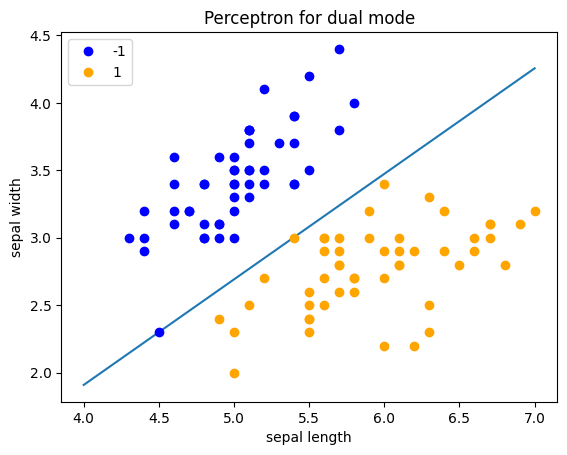

In [31]:
plot(perceptron2, "Perceptron for dual mode")

## Implement by scikit-learn Perceptron

In [33]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X,y)

Perceptron()

In [36]:
# weights assigned to the features
clf.coef_

array([[ 23.2, -38.7]])

In [37]:
# Constants in decision function. b
clf.intercept_

array([-5.])

In [38]:
clf.n_iter_

8

/tmp/ipykernel_940483/442686210.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], "bo", color = "blue", label = "-1")
/tmp/ipykernel_940483/442686210.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], "bo", color = "orange", label = "1")


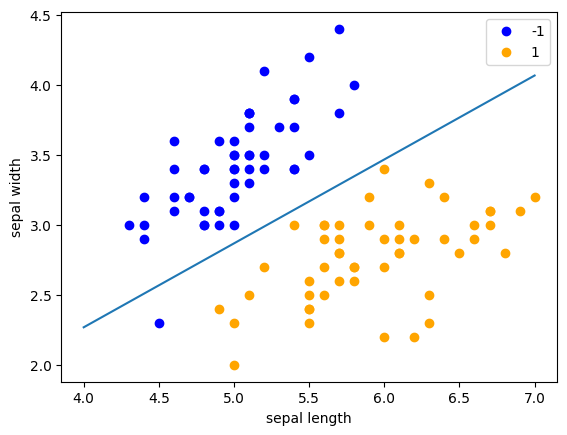

In [40]:
x_points = np.linspace(4, 7, 10)
y_ = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]

plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], "bo", color = "blue", label = "-1")
plt.plot(data[50:100, 0], data[50:100, 1], "bo", color = "orange", label = "1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()